<a href="https://colab.research.google.com/github/Piaozan/29CM/blob/main/29cm_power_user.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요패키지 import
import time
import json
import urllib
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# #코랩 한글깨짐 방지 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings(action='ignore')

sns.set_palette("RdBu")

In [ ]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# 파일 불러오기

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# # merge

# event = pd.read_csv('/content/gdrive/MyDrive/Final Project/sampled_events.csv')
# product = pd.read_csv('/content/gdrive/MyDrive/Final Project/sampled_products.csv')
# user = pd.read_csv('/content/gdrive/MyDrive/Final Project/sampled_users.csv')

# event_product = event.merge(product, on='item_no', how='left')
# commerce = event_product.merge(user, on='user_no', how='left')

commerce = pd.read_csv('/content/gdrive/MyDrive/Final Project/data/파이널 프로젝트_2조_29INCH_데이터1.csv')
final = pd.read_csv('/content/gdrive/MyDrive/Final Project/data/파이널 프로젝트_2조_29INCH_데이터2.csv')

In [ ]:
final.event_name.unique()

array(['click_item', 'purchase_success', 'like_item', 'add_to_cart'],
      dtype=object)

In [ ]:
final[(final['event_name']=='purchase_success')&(final['platform']=='IOS')]

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,country,region,platform,item_name,price,category1_name,category2_name,category3_name,brand_name,birth_date,gender,나이대,event_month,event_day,event_weekday,event_hour,buyer,item_per_cnt,total_per_price,power_user,week
2,a26a03a8f61bd3c476799f19ab57b22f,2021-06-06,purchase_success,qtcoyasZW4XF7NpbcSB4mg==,BWQ0HfKAo3/K7EMrMTcVxQ==,mobile,Apple,South Korea,Seoul,IOS,S S/S T-SHIRT,38000.0,의류,상의,티셔츠,NEITHERS,1989-04-22,F,30대,6,6,6,0,1.0,1.0,38000.0,0.0,1
40,ba59e9753854d31b20b99bf077489352,2021-06-06,purchase_success,VRrtC/tlBa5w+2IQ/JTuWg==,uhO46BOgdxWuWs4eZpg/OQ==,mobile,Apple,South Korea,Busan,IOS,BY-D692 리나 크로스백_12Colors,79800.0,잡화,가방,크로스백,DORIS,1994-10-27,F,20대,6,6,6,0,1.0,7.0,296700.0,1.0,1
56,8266ade9806541ebd5cc2e556456cd60,2021-06-06,purchase_success,zELdzs6vdMnfvCDDQUeuQA==,hmEA/PugiMNb3998uEAAKg==,mobile,Apple,South Korea,Seoul,IOS,Plain round-neck tee - Yellow green,29000.0,의류,상의,티셔츠,BEMUSE MANSION,1991-09-29,NaN,30대,6,6,6,0,1.0,3.0,126000.0,1.0,1
57,8266ade9806541ebd5cc2e556456cd60,2021-06-06,purchase_success,zELdzs6vdMnfvCDDQUeuQA==,r2t/GXwGXHk56iaxh2ijgw==,mobile,Apple,South Korea,Seoul,IOS,골지큐브 브라렛 세트,60000.0,컬처,언더웨어,속옷세트,comfortlab,1991-09-29,NaN,30대,6,6,6,0,1.0,3.0,126000.0,1.0,1
58,8266ade9806541ebd5cc2e556456cd60,2021-06-06,purchase_success,zELdzs6vdMnfvCDDQUeuQA==,iAW7DKl/augX1HKIU9IgYw==,mobile,Apple,South Korea,Seoul,IOS,21SS 에센셜 로고 티셔츠 - 블랙,37000.0,의류,상의,티셔츠,InstantFunk,1991-09-29,NaN,30대,6,6,6,0,1.0,3.0,126000.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354460,0c4cfae9bb20740984bc69b2b9b37dcd,2021-07-31,purchase_success,Ojdr73wimR19ktGy5a/cgQ==,dw8j/nwl92shDTF9TZjPuQ==,mobile,Apple,South Korea,Seoul,IOS,ROSA volume v neck dress[BL],118000.0,의류,원피스/점프수트,원피스,LENINA,1987-04-25,F,30대,7,31,5,23,1.0,4.0,281000.0,1.0,8
5354462,0e80627b065f42ceda0f4464845f2c65,2021-07-31,purchase_success,2AEec7WX31RihF0cICB3BA==,crUKQBYA8OLgqWxmns9bOA==,mobile,Apple,South Korea,Seoul,IOS,HALF COURT T-SHIRTS CREAM,48000.0,의류,상의,티셔츠,TENNiS BOY CLUB (매입),1996-01-09,F,20대,7,31,5,23,1.0,1.0,48000.0,0.0,8
5354477,8f5ac147f28127ca2371032eba863b77,2021-07-31,purchase_success,Hvs8IGWd6nZEPlRmtShjTg==,V80UnjjcI1/iynf10e1+EA==,mobile,Apple,South Korea,Seoul,IOS,Pin-tuck Shirt Dress - Black,155000.0,의류,원피스/점프수트,원피스,ARETHAT,NaN,NaN,90대,7,31,5,23,1.0,5.0,808000.0,1.0,8
5354478,8f5ac147f28127ca2371032eba863b77,2021-07-31,purchase_success,Hvs8IGWd6nZEPlRmtShjTg==,nJP2XqX0tzZNRBEfQv3heA==,mobile,Apple,South Korea,Seoul,IOS,Baby Bear necklace,157000.0,잡화,주얼리,목걸이,ae,NaN,NaN,90대,7,31,5,23,1.0,5.0,808000.0,1.0,8


## 테이블 만들기

In [ ]:
total = commerce.copy()

In [ ]:
# 출생년도
total['birth_date'] = pd.to_datetime(total['birth_date'], errors = 'coerce')

# 나이 계산
total['age'] = 2021 - total['birth_date'].dt.year

# 나이대
total['나이대'] = np.where(total['age'] < 10, '0-9세', 
                        np.where(total['age'] < 20, '10대',
                        np.where(total['age'] < 30, '20대',
                        np.where(total['age'] < 40, '30대',
                        np.where(total['age'] < 50, '40대',
                        np.where(total['age'] < 60, '50대',
                        np.where(total['age'] < 70, '60대', 
                        np.where(total['age'] < 80, '70대',
                        np.where(total['age'] < 90, '80대','90대')))))))))

In [ ]:
# event timestamp => datetime
total['event_timestamp'] = pd.to_datetime(total['event_timestamp'], errors = 'coerce')

# event_year은 모두 2021년이라 삭제

total['event_month'] = total['event_timestamp'].dt.month
total['event_day'] = total['event_timestamp'].dt.day
total['event_weekday'] = total['event_timestamp'].dt.dayofweek
total['event_hour'] = total['event_timestamp'].dt.hour
total['event_minute'] = total['event_timestamp'].dt.minute
total['event_timestamp'] = total['event_timestamp'].dt.date

In [ ]:
total['event_timestamp'] = pd.to_datetime(total['event_timestamp'])

# 날짜 기준 (6.6 ~ 7.31)
total = total[(total['event_timestamp'] >= '2021-06-06') & (total['event_timestamp'] <= '2021-07-31')]

In [ ]:
# 구매자 리스트 (중복 없음)
buyer_list = total[total['event_name'] == 'purchase_success'].drop_duplicates(['user_no'], keep='first')

# 구매자이면 1, 아니면 NaN
buyer_list['buyer'] = 1

buyer_list = buyer_list[['user_no','buyer']]

In [ ]:
# 구매자, 비구매자 구분 : 'buyer' 구매자 1, 비구매자 0
total = total.merge(buyer_list, on='user_no', how='left')

total['buyer'].fillna(0, inplace=True)

In [ ]:
total.drop(['mobile_model_name','mobile_marketing_name','operating_system_version','image_name','category1_code','category2_code','category3_code','brand_no','event_minute','age','birth_date'], axis=1, inplace=True)

In [ ]:
total.head(3)

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,country,region,platform,item_name,price,category1_name,category2_name,category3_name,brand_name,gender,나이대,event_month,event_day,event_weekday,event_hour,buyer
0,5240d1b731949382c749c79db207b2fa,2021-06-06,click_item,j2PG6ak1chv+aTkyNM3JzA==,JdwoJ4a/Z2YK5nKCKWUiyw==,mobile,Apple,South Korea,Seoul,IOS,WOOL SILK CROP JACKET - SEAL BROWN,135000.0,의류,아우터,재킷,MORE OR LESS,F,20대,6,6,6,0,0.0
1,5ae2c24c1c3e9dc228846c772cfbbbdc,2021-06-06,click_item,tBR8q7ZrRkJwO88bCX6aKA==,V9vAu4jSKMu64NY9zU155Q==,mobile,Apple,South Korea,Seoul,IOS,cl half pants (bone),117000.0,의류,하의,바지,MOIA,F,20대,6,6,6,0,1.0
2,a26a03a8f61bd3c476799f19ab57b22f,2021-06-06,purchase_success,qtcoyasZW4XF7NpbcSB4mg==,BWQ0HfKAo3/K7EMrMTcVxQ==,mobile,Apple,South Korea,Seoul,IOS,S S/S T-SHIRT,38000.0,의류,상의,티셔츠,NEITHERS,F,30대,6,6,6,0,1.0


### power_user & non_power_user

In [ ]:
total[total['buyer'] == 1]['user_no'].nunique()

138279

In [ ]:
# 구매자 나누기
user = total[(total['buyer'] == 1) & (total['event_name'] == 'purchase_success')]

# 구매자 기준 구매 상품 개수 
user_no = user.groupby(['user_no'])['item_no'].count().reset_index().sort_values('item_no', ascending=False)
user_no['user_cnt'] = 1

# 구매자 기준 구매 금액 랭킹
user_price = user.groupby(['user_no'])['price'].sum().reset_index().sort_values('price', ascending=False)

user_total = user_no.merge(user_price, on='user_no', how='left')

In [ ]:
user_total

,user_no,item_no,user_cnt,price
0,b2xZVfUtjyGsZckO7j6zkg==,246,1,28841100.0
1,anAN3a+fvEnnvFdQ61+Egw==,203,1,22966700.0
2,QYfrbtFOWrk6s0kyW/HAtQ==,147,1,7460990.0
3,S5rrjhjiYmOBfYlCTCitoQ==,132,1,4339200.0
4,NNQiP/5+hZPlrcm/raV6gg==,122,1,6151500.0
...,...,...,...,...
138274,aM5VoeFsjA3VA5AxMeU7RQ==,1,1,43800.0
138275,aM88zqdjmbbMMK1oqMSXGA==,1,1,65000.0
138276,aM9Aqlfo/zYtlb0HwNgIhA==,1,1,49900.0
138277,aMF2JdUJeWDBX3cwHPXMVA==,1,1,26000.0


In [ ]:
# power_user 기준 정하기 
user_vip = user_total[(( user_total['item_no'] >= 3 ) & ((user_total['price'] / user_total['item_no']) >= 10000))| ( user_total['price'] >= 166000 )]

user_vip = user_vip.sort_values(['price','item_no'], ascending=False)
user_total = user_vip.append(user_total)

user_total = user_total.drop_duplicates('user_no', keep='first')
user_normal = user_total[59526:]
user_normal = user_normal.sort_values(['price','item_no'], ascending=False)

user_total = user_vip.append(user_normal)

In [ ]:
# power_user 기준 정하기 
user_vip = user_total[(( user_total['item_no'] >= 3 ) & ((user_total['price'] / user_total['item_no']) >= 10000))| ( user_total['price'] >= 166000 )]

In [ ]:
# 비구매자 user_no
unbuyer = total[(total['buyer'] == 0)]

unbuyer = unbuyer.groupby(['user_no'])['item_no'].count().reset_index()
unbuyer['item_no'] = 0
unbuyer['user_cnt'] = 1
unbuyer['price'] = 0

user_total = user_total.append(unbuyer)

In [ ]:
# 유저 수 누적 비율
user_total['user_cnt_cum'] =  user_total['user_cnt'].cumsum()
user_total['user_per_percent'] = user_total['user_cnt'] / len(user_total) * 100
user_total['user_per_percent_cum'] = user_total['user_per_percent'].cumsum()

# 유저 구매 금액 누적 비율
user_total['price_cum'] = user_total['price'].cumsum()
user_total['price_per_percent'] = user_total['price'] / sum(user_total['price']) * 100
user_total['price_per_percent_cum'] = user_total['price_per_percent'].cumsum()

# 유저 구매 상품 개수 누적 비율
user_total['item_no_cum'] = user_total['item_no'].cumsum()
user_total['item_per_percent'] = user_total['item_no'] / sum(user_total['item_no']) * 100
user_total['item_per_percent_cum'] = user_total['item_per_percent'].cumsum()

# 필요없는 컬럼 삭제
user_total = user_total.drop(['user_cnt','item_per_percent','user_cnt_cum','user_per_percent','item_no_cum','price_cum','price_per_percent'], axis=1)

In [ ]:
# 전체 유저 순서 정렬
user_total.reset_index(drop=True, inplace=True)

# 파워 유저 & 논 파워 유저(only 구매자)
user_vip = user_total[:59525]
user_normal = user_total[59526:]

In [ ]:
# 파워 유저 & 논 파워 유저(구매자 & 비구매자 포함)
user_vip['power_user'] = 1

user_total = user_total.merge(user_vip, on=['user_no', 'item_no', 'price', 'user_per_percent_cum',
       'price_per_percent_cum', 'item_per_percent_cum'], how='left')

user_total['power_user'].fillna(0, inplace=True)
user_cum = user_total.drop(['user_per_percent_cum','price_per_percent_cum','item_per_percent_cum'], axis=1)

user_cum.columns = ['user_no','item_per_cnt','total_per_price','power_user']

In [ ]:
user_total

,user_no,item_no,price,user_per_percent_cum,price_per_percent_cum,item_per_percent_cum,power_user
0,b2xZVfUtjyGsZckO7j6zkg==,246,28841100.0,0.00041,0.113023,0.057963,1.0
1,anAN3a+fvEnnvFdQ61+Egw==,203,22966700.0,0.00082,0.203026,0.105794,1.0
2,pywOPeCTmJKudBVHC1/5iw==,15,11035900.0,0.00123,0.246274,0.109328,1.0
3,8j/l4DjsSqXcIR9r5GAmLQ==,115,10068900.0,0.00164,0.285732,0.136425,1.0
4,tCbVorRR1nnG7W2rSzxZNQ==,3,10008000.0,0.00205,0.324952,0.137132,1.0
...,...,...,...,...,...,...,...
243866,zzrlop3HrqxAgIT0VJ9wRg==,0,0.0,99.99836,100.000000,100.000000,0.0
243867,zzwOfX9q6MNyni9Ff8Ws6A==,0,0.0,99.99877,100.000000,100.000000,0.0
243868,zzwQnhNQeYnzcsjywnIh3g==,0,0.0,99.99918,100.000000,100.000000,0.0
243869,zzxlG1wzPCGvsW0SlOleDg==,0,0.0,99.99959,100.000000,100.000000,0.0


In [ ]:
user_vip

,user_no,item_no,price,user_per_percent_cum,price_per_percent_cum,item_per_percent_cum,power_user
0,b2xZVfUtjyGsZckO7j6zkg==,246,28841100.0,0.000410,0.113023,0.057963,1
1,anAN3a+fvEnnvFdQ61+Egw==,203,22966700.0,0.000820,0.203026,0.105794,1
2,pywOPeCTmJKudBVHC1/5iw==,15,11035900.0,0.001230,0.246274,0.109328,1
3,8j/l4DjsSqXcIR9r5GAmLQ==,115,10068900.0,0.001640,0.285732,0.136425,1
4,tCbVorRR1nnG7W2rSzxZNQ==,3,10008000.0,0.002050,0.324952,0.137132,1
...,...,...,...,...,...,...,...
59520,DyasvMcma5FbF2AHHu+ubw==,3,30000.0,24.406756,80.056973,74.639146,1
59521,2y/T4u1hI1U5+ww0mqLdnA==,3,30000.0,24.407166,80.057091,74.639853,1
59522,I56mmeC+DT7GueHwbOVeow==,3,30000.0,24.407576,80.057208,74.640560,1
59523,7/PpFKdDqzuxcluFxAryyQ==,3,30000.0,24.407986,80.057326,74.641267,1


In [ ]:
# # merge
# final_user = total.merge(user_cum, on='user_no', how='left')

# # week 만들기
# final_user['week'] = np.where(final_user['event_timestamp'] <= '2021-06-12', 1, 
#                         np.where(final_user['event_timestamp'] <= '2021-06-19', 2,
#                         np.where(final_user['event_timestamp'] <= '2021-06-26', 3,
#                         np.where(final_user['event_timestamp'] <= '2021-07-03', 4,
#                         np.where(final_user['event_timestamp'] <= '2021-07-10', 5,
#                         np.where(final_user['event_timestamp'] <= '2021-07-17', 6,
#                         np.where(final_user['event_timestamp'] <= '2021-07-24', 7, 8)))))))

In [ ]:
# # 데이터 추출
# final_user.to_csv('/content/gdrive/MyDrive/Final Project/real_real_real_final_user.csv', index=False)

# 파워 유저 & 논 파워 유저

## 전체 대비 비교

In [ ]:
user_total

,user_no,item_no,price,user_per_percent_cum,price_per_percent_cum,item_per_percent_cum,power_user
0,b2xZVfUtjyGsZckO7j6zkg==,246,28841100.0,0.00041,0.113023,0.057963,1.0
1,anAN3a+fvEnnvFdQ61+Egw==,203,22966700.0,0.00082,0.203026,0.105794,1.0
2,pywOPeCTmJKudBVHC1/5iw==,15,11035900.0,0.00123,0.246274,0.109328,1.0
3,8j/l4DjsSqXcIR9r5GAmLQ==,115,10068900.0,0.00164,0.285732,0.136425,1.0
4,tCbVorRR1nnG7W2rSzxZNQ==,3,10008000.0,0.00205,0.324952,0.137132,1.0
...,...,...,...,...,...,...,...
243866,zzrlop3HrqxAgIT0VJ9wRg==,0,0.0,99.99836,100.000000,100.000000,0.0
243867,zzwOfX9q6MNyni9Ff8Ws6A==,0,0.0,99.99877,100.000000,100.000000,0.0
243868,zzwQnhNQeYnzcsjywnIh3g==,0,0.0,99.99918,100.000000,100.000000,0.0
243869,zzxlG1wzPCGvsW0SlOleDg==,0,0.0,99.99959,100.000000,100.000000,0.0


## 다른 데이터와의 혼합

In [ ]:
# 날짜 기준 (6.6 ~ 7.31)
final = final[(final['event_timestamp'] >= '2021-06-06') & (final['event_timestamp'] <= '2021-07-31')]

In [ ]:
final.head(2)

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,country,region,platform,item_name,price,category1_name,category2_name,category3_name,brand_name,birth_date,gender,나이대,event_month,event_day,event_weekday,event_hour,buyer,item_per_cnt,total_per_price,power_user,week
0,5240d1b731949382c749c79db207b2fa,2021-06-06,click_item,j2PG6ak1chv+aTkyNM3JzA==,JdwoJ4a/Z2YK5nKCKWUiyw==,mobile,Apple,South Korea,Seoul,IOS,WOOL SILK CROP JACKET - SEAL BROWN,135000.0,의류,아우터,재킷,MORE OR LESS,1995-07-07,F,20대,6,6,6,0,0.0,0.0,0.0,0.0,1
1,5ae2c24c1c3e9dc228846c772cfbbbdc,2021-06-06,click_item,tBR8q7ZrRkJwO88bCX6aKA==,V9vAu4jSKMu64NY9zU155Q==,mobile,Apple,South Korea,Seoul,IOS,cl half pants (bone),117000.0,의류,하의,바지,MOIA,1993-02-11,F,20대,6,6,6,0,1.0,1.0,128000.0,0.0,1


In [ ]:
# 각 유저 별 총 클릭 횟수
click_cnt_power = final[(final['power_user'] == 1) & (final['event_name'] == 'click_item')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns = {'item_no' : 'click_cnt'})
click_cnt_non_power = final[(final['power_user'] == 0) & (final['event_name'] == 'click_item')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns = {'item_no' : 'click_cnt'})

# 각 유저 별 총 장바구니 횟수
cart_cnt_power = final[(final['power_user'] == 1) & (final['event_name'] == 'add_to_cart')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns = {'item_no' : 'cart_cnt'})
cart_cnt_non_power = final[(final['power_user'] == 0) & (final['event_name'] == 'add_to_cart')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns = {'item_no' : 'cart_cnt'})

# 각 유저 별 총 좋아요 횟수
like_cnt_power = final[(final['power_user'] == 1) & (final['event_name'] == 'like_item')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns = {'item_no' : 'like_cnt'})
like_cnt_non_power = final[(final['power_user'] == 0) & (final['event_name'] == 'like_item')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns = {'item_no' : 'like_cnt'})

In [ ]:
# 각 행동 패턴, 각 유저 행동 횟수
click_cnt = click_cnt_power.append(click_cnt_non_power)
cart_cnt = cart_cnt_power.append(cart_cnt_non_power)
like_cnt = like_cnt_power.append(like_cnt_non_power)

In [ ]:
# 행동 패턴 테이블 합치기
user_total = user_total.merge(click_cnt, on='user_no', how='left')
user_total = user_total.merge(cart_cnt, on='user_no', how='left')
user_total = user_total.merge(like_cnt, on='user_no', how='left')

In [ ]:
# 행동 패턴 결측치 정리
user_total.fillna(0, inplace=True)
user_total.isnull().sum().sum()

0

In [ ]:
# 기타 인적 사항 테이블 만들기
user_info = final[['user_no','buyer','mobile_brand_name','region','platform','gender','나이대']]
user_info.drop_duplicates('user_no', keep='first', inplace=True)
# user_total = user_total.merge(user_info, on='user_no', how='left')

In [ ]:
user_total = user_total.merge(user_info, on='user_no', how='left')

In [ ]:
# 전체 유저no
all_user_no = final[['user_no']]

# 의류 구매자 테이블
clothes_cnt = final[(final['category1_name'] == '의류') & (final['event_name'] == 'purchase_success')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns={'item_no' : '의류'})

# 전체 유저no & 의류 구매자 테이블 합치기
category_p_cnt = all_user_no.merge(clothes_cnt,on='user_no', how='left')

In [ ]:
# 각 유저 카테고리 별 구매 개수 테이블
for category in final['category1_name'].unique()[1:-5]:
    category_cnt =  final[(final['category1_name'] == category) & (final['event_name'] == 'purchase_success')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns={'item_no' : category})
    category_p_cnt = category_p_cnt.merge(category_cnt, on='user_no', how='left')

# 비구매자 결측치 0으로 대체
category_p_cnt.fillna(0, inplace=True)
# 중복 유저 no 제거
category_p_cnt.drop_duplicates('user_no', keep='first', inplace=True)

In [ ]:
# user_total과 카테고리 별 구매 개수 테이블 합치기

user_total = user_total.merge(category_p_cnt, on='user_no', how='left')

In [ ]:
# 전체 유저no
all_user_no = final[['user_no']]

# 일요일 구매자 테이블
sunday_cnt = final[(final['event_weekday'] == 6) & (final['event_name'] == 'purchase_success')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns={'item_no' : '일요일'})

# 전체 유저no & 의류 구매자 테이블 합치기
week_p_cnt = all_user_no.merge(sunday_cnt,on='user_no', how='left')

In [ ]:
# 각 유저 요일 별 구매 개수 테이블
for week in final['event_weekday'].unique()[1:]:
    week_cnt =  final[(final['event_weekday'] == week) & (final['event_name'] == 'purchase_success')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns={'item_no' : week})
    week_p_cnt = week_p_cnt.merge(week_cnt, on='user_no', how='left')

# 비구매자 결측치 0으로 대체
week_p_cnt.fillna(0, inplace=True)
# 중복 유저 no 제거
week_p_cnt.drop_duplicates('user_no', keep='first', inplace=True)
# 요일 이름 바꾸기
week_p_cnt.columns = ['user_no','일요일','월요일','화요일','수요일','목요일','금요일','토요일']

In [ ]:
# user_total과 요일 별 구매 개수 테이블 합치기

user_total = user_total.merge(week_p_cnt, on='user_no', how='left')

In [ ]:
user_total['item_per_price'] = user_total['price'] / user_total['item_no'] 

In [ ]:
user_total['item_per_price'].fillna(0, inplace=True)

In [ ]:
user_total.rename(columns = {'item_no' : 'buy_cnt'}, inplace=True)

## 각 user 특성에 따른 종합적인 분석

In [ ]:
user_total.head(2)

,user_no,buy_cnt,price,user_per_percent_cum,price_per_percent_cum,item_per_percent_cum,power_user,click_cnt,cart_cnt,like_cnt,buyer,mobile_brand_name,region,platform,gender,나이대,의류,생활/건강,스포츠/레저,잡화,화장품/미용,가구/인테리어,컬처,디지털/가전,식품,키즈,반려동물,성년의날,일요일,월요일,화요일,수요일,목요일,금요일,토요일,item_per_price
0,b2xZVfUtjyGsZckO7j6zkg==,246,28841100.0,0.00041,0.113023,0.057963,1.0,7534.0,0.0,0.0,1.0,Apple,Chungcheongnam-do,IOS,F,40대,238.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,23.0,42.0,31.0,37.0,34.0,50.0,117240.243902
1,anAN3a+fvEnnvFdQ61+Egw==,203,22966700.0,0.00082,0.203026,0.105794,1.0,325.0,105.0,0.0,1.0,Samsung,Seoul,ANDROID,F,40대,171.0,9.0,2.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,0.0,0.0,13.0,113136.453202


In [ ]:
user_total['buyer'] = np.where(user_total['buyer'] == 1, '구매자','비구매자')
user_total['power_user'] = np.where(user_total['power_user'] == 1, '파워유저','논파워유저')

### Power user & Non power user 행동 차이

In [ ]:
# 전체

action = user_total.pivot_table(index = ['power_user'], values = ['buy_cnt','click_cnt','cart_cnt','like_cnt','price','item_per_price'] ,aggfunc='mean')
action = action[['click_cnt','cart_cnt','like_cnt','buy_cnt','price','item_per_price']]
action.rename(columns = {'click_cnt' : '인당클릭수', 'cart_cnt':'인당장바구니수','like_cnt':'인당좋아요수', 'buy_cnt':'인당구매수', 'price':'총구매금액','item_per_price':'상품별금액'})

# click user 대비 -> cart, like_cnt ,buy_cnt (취약점 찾기)
# 이탈률(click->cart) (어디가 취약점인지)

,인당클릭수,인당장바구니수,인당좋아요수,인당구매수,총구매금액,상품별금액
power_user,,,,,,
논파워유저,11.015937,0.632761,0.531360,0.583804,27605.162949,21967.888553
파워유저,38.934717,3.399210,1.618547,5.321932,343198.600689,82557.920530


In [ ]:
# action.to_excel('/content/gdrive/MyDrive/Final Project/data/전체행태.xlsx')

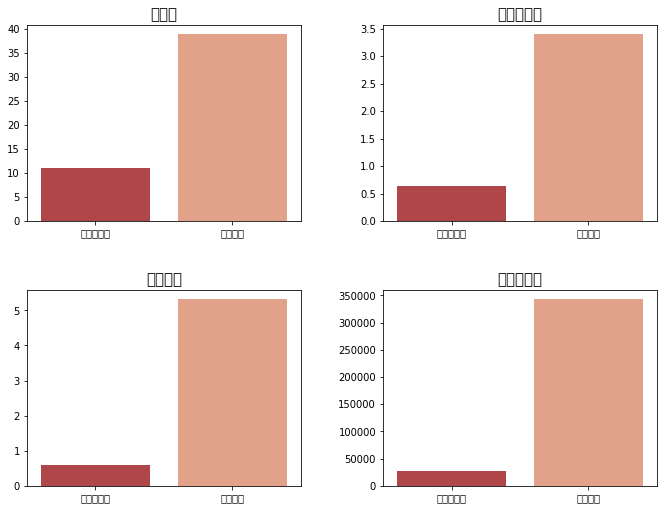

In [ ]:
f,ax = plt.subplots(2,2, figsize=(10,8))

sns.barplot(action.index,'click_cnt', data=action, ax=ax[0,0])
ax[0,0].set_title('클릭수', fontsize=15)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')

sns.barplot(action.index,'cart_cnt', data=action, ax=ax[0,1])
ax[0,1].set_title('장바구니수', fontsize=15)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')

sns.barplot(action.index,'buy_cnt', data=action, ax=ax[1,0])
ax[1,0].set_title('구매개수', fontsize=15)
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')

sns.barplot(action.index,'price', data=action, ax=ax[1,1])
ax[1,1].set_title('총구매금액', fontsize=15)
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=1, top=0.9, wspace=0.3, hspace=0.35)

In [ ]:
# 전체 (구매자 & 비구매자)

action = user_total.pivot_table(index = ['power_user','buyer'], values = ['buy_cnt','click_cnt','cart_cnt','like_cnt','price','item_per_price'] ,aggfunc='mean')
action = action[['click_cnt','cart_cnt','like_cnt','buy_cnt','price','item_per_price']]
action.rename(columns = {'click_cnt' : '인당클릭수', 'cart_cnt':'인당장바구니수','like_cnt':'인당좋아요수', 'buy_cnt':'인당구매수', 'price':'총구매금액','item_per_price':'상품별금액'})

# non_power -> like 앞도
# 어떻게 like, cart -> action plan 쿠폰 -> 구매 상승 (간단한 아이디어) (흥미로운 점 -> deep dive)
# highlilght 부분 (지적)
# highlight부분만 그래프화

인당클릭수   인당장바구니수    인당좋아요수     인당구매수          총구매금액  \
power_user buyer                                                           
논파워유저      구매자     9.533419  0.640799  0.436547  1.305965   61752.516370   
           비구매자   12.214424  0.626263  0.608007  0.000000       0.000000   
파워유저       구매자    38.934717  3.399210  1.618547  5.321932  343198.600689   

                         상품별금액  
power_user buyer                
논파워유저      구매자    49141.981158  
           비구매자       0.000000  
파워유저       구매자    82557.920530

In [ ]:
# # 논파워유저 (구매자 vs 비구매자)

# action.to_excel('/content/gdrive/MyDrive/Final Project/data/구매자vs비구매자.xlsx')

In [ ]:
# 성별
action = user_total.pivot_table(index = ['power_user','gender'], values = ['buy_cnt','click_cnt','cart_cnt','like_cnt','price','item_per_price'] ,aggfunc='mean')
action = action[['click_cnt','cart_cnt','like_cnt','buy_cnt','price','item_per_price']]
action

click_cnt  cart_cnt  like_cnt   buy_cnt          price  \
power_user gender                                                           
논파워유저      F       12.469489  0.710118  0.548306  0.597378   27604.152291   
           M        8.190530  0.455072  0.403586  0.631351   31718.983235   
파워유저       F       44.517546  3.822120  1.751593  5.589758  353781.113947   
           M       25.866463  2.351655  1.195819  4.776829  329243.814460   

                   item_per_price  
power_user gender                  
논파워유저      F         21836.569690  
           M         25610.064203  
파워유저       F         79150.989996  
           M         92508.612614

In [ ]:
# # 성별
# action.to_excel('/content/gdrive/MyDrive/Final Project/data/성별.xlsx')

In [ ]:
# 나이대
age_total = user_total[(user_total['나이대'] == '20대') |
           (user_total['나이대'] == '30대') |
           (user_total['나이대'] == '40대') |
           (user_total['나이대'] == '50대') ]

action = age_total.pivot_table(index = ['power_user','나이대'], values = ['buy_cnt','click_cnt','cart_cnt','like_cnt','price','item_per_price'] ,aggfunc='mean')
action = action[['click_cnt','cart_cnt','like_cnt','buy_cnt','price','item_per_price']]
action

click_cnt   cart_cnt  like_cnt   buy_cnt          price  \
power_user 나이대                                                            
논파워유저      20대  11.516437   0.302232  0.506893  0.610180   28852.886048   
           30대  11.519543   0.727793  0.497782  0.600262   28796.150784   
           40대  11.774449   1.819937  0.694586  0.546262   25480.130049   
           50대  12.193661   2.251664  0.620602  0.603170   28562.535658   
파워유저       20대  35.439952   1.483561  1.421061  4.911375  314214.877572   
           30대  41.144355   3.299427  1.519032  5.606384  362492.210458   
           40대  52.178683   9.192362  2.387005  6.375748  408542.773582   
           50대  58.259067  15.535406  3.839378  6.389465  430147.547496   

                item_per_price  
power_user 나이대                  
논파워유저      20대    22988.521405  
           30대    22808.684870  
           40대    20025.439434  
           50대    22973.432286  
파워유저       20대    80890.427976  
           30대    82441.089015  
           40대    82698.500145  
           50대    87506.660297

In [ ]:
# # 나이대

# action.to_excel('/content/gdrive/MyDrive/Final Project/data/나이대.xlsx')

In [ ]:
# platform
action = user_total.pivot_table(index = ['power_user','platform'], values = ['buy_cnt','click_cnt','cart_cnt','like_cnt','price','item_per_price'] ,aggfunc='mean')
action = action[['click_cnt','cart_cnt','like_cnt','buy_cnt','price','item_per_price']]
action

# os간의 ui 차이

click_cnt   cart_cnt  like_cnt   buy_cnt          price  \
power_user platform                                                            
논파워유저      ANDROID    7.478786   2.450214  2.054703  0.508938   24335.238456   
           IOS       12.243458   0.002039  0.002704  0.609786   28739.946432   
파워유저       ANDROID   36.343439  14.320239  6.818745  5.633718  370184.788144   
           IOS       39.735469   0.024410  0.011589  5.225584  334859.368482   

                     item_per_price  
power_user platform                  
논파워유저      ANDROID     19375.130927  
           IOS         22867.670348  
파워유저       ANDROID     86348.545866  
           IOS         81386.547029

In [ ]:
# # 플랫폼

# action.to_excel('/content/gdrive/MyDrive/Final Project/data/플랫폼.xlsx')

In [ ]:
# 나이대 & 성별
age_total = user_total[(user_total['나이대'] == '20대') |
           (user_total['나이대'] == '30대') |
           (user_total['나이대'] == '40대') |
           (user_total['나이대'] == '50대') ]

action = age_total.pivot_table(index = ['power_user','나이대'],columns='gender', values = ['buy_cnt','click_cnt','cart_cnt','like_cnt','price','item_per_price'] ,aggfunc='mean')
action = action[['click_cnt','cart_cnt','like_cnt','buy_cnt','price','item_per_price']]
action

click_cnt              cart_cnt            like_cnt            \
gender                  F          M          F         M         F         M   
power_user 나이대                                                                  
논파워유저      20대  12.590724   8.387720   0.293278  0.315632  0.488550  0.428509   
           30대  12.746290   8.262925   0.794918  0.495815  0.530453  0.350074   
           40대  12.619252   8.592230   2.062212  0.890721  0.725617  0.397988   
           50대  12.890805   7.056261   2.451149  1.083485  0.633005  0.526316   
파워유저       20대  38.936411  23.959243   1.405817  1.776705  1.419663  1.376859   
           30대  46.012402  26.247766   3.625157  2.098972  1.669101  0.906836   
           40대  57.580712  33.012529  10.168770  5.016445  2.601243  1.386844   
           50대  63.771585  30.722222  17.685246  5.400000  4.358470  1.722222   

                 buy_cnt                    price                 \
gender                 F         M              F              M   
power_user 나이대                                                     
논파워유저      20대  0.613729  0.631807   28166.985293   32429.334454   
           30대  0.596143  0.642705   28164.785430   32080.282291   
           40대  0.538266  0.608161   24878.462212   28632.356065   
           50대  0.586207  0.736842   27893.004926   34142.540835   
파워유저       20대  5.042095  4.508209  315784.937137  313611.464168   
           30대  5.830206  4.929848  370731.800680  341675.663539   
           40대  6.636278  5.458888  425725.484084  353829.968677   
           50대  6.646995  4.938889  439095.464481  369472.222222   

               item_per_price                 
gender                      F              M  
power_user 나이대                                
논파워유저      20대   22323.461333   26267.473486  
           30대   22232.620699   25687.282445  
           40대   19434.564508   22852.355832  
           50대   22340.409603   28200.165284  
파워유저       20대   78652.160095   89975.994580  
           30대   79303.905767   94538.474144  
           40대   80699.166088   92333.670815  
           50대   82186.990799  113905.305040

In [ ]:
# # 플랫폼

# action.to_excel('/content/gdrive/MyDrive/Final Project/data/나이대&성별.xlsx')

In [ ]:
age_total.groupby(['platform'])['나이대'].value_counts()

platform  나이대
ANDROID   30대    21219
          20대    17689
          40대    12272
          50대     2631
IOS       20대    89234
          30대    55435
          40대    12201
          50대     1682
Name: 나이대, dtype: int64

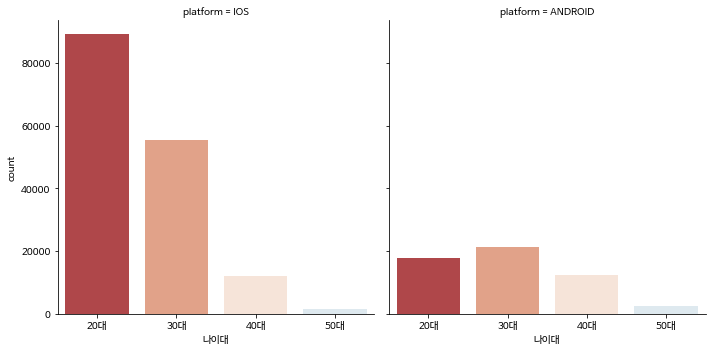

In [ ]:
age_total = user_total[(user_total['나이대'] == '20대') |
           (user_total['나이대'] == '30대') |
           (user_total['나이대'] == '40대') |
           (user_total['나이대'] == '50대') ]

sns.catplot('나이대', data=age_total, col='platform', kind='count', order= ['20대','30대','40대','50대'])
plt.show()

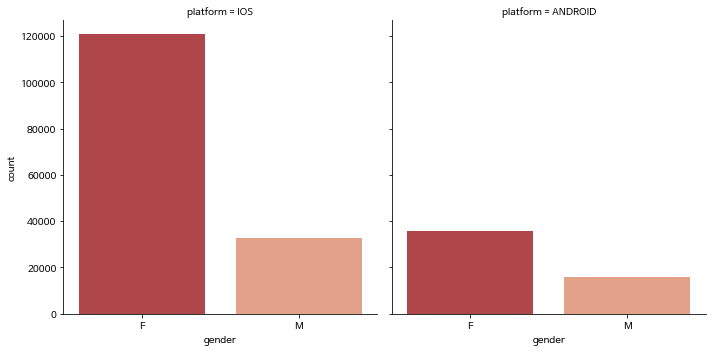

In [ ]:
sns.catplot('gender', data=user_total, col='platform', kind='count')
plt.show()

In [ ]:
user_total.groupby(['platform'])['gender'].value_counts()

platform  gender
ANDROID   F          35878
          M          15921
IOS       F         120718
          M          32540
Name: gender, dtype: int64

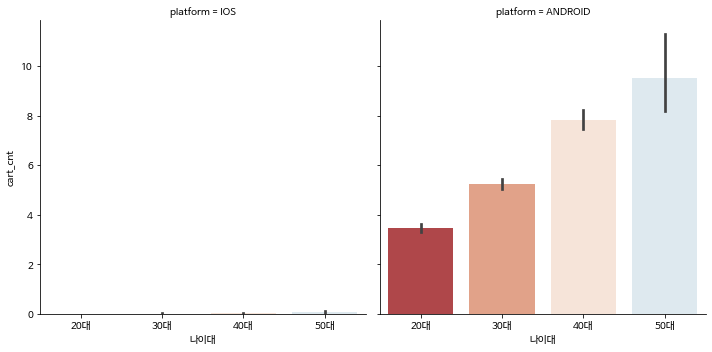

In [ ]:
sns.catplot('나이대', 'cart_cnt',data=age_total, col='platform', kind='bar', order= ['20대','30대','40대','50대'])
plt.show()

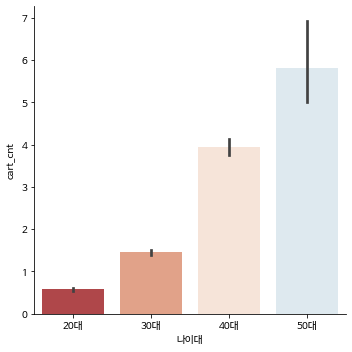

In [ ]:
sns.catplot('나이대', 'cart_cnt',data=age_total, kind='bar', order= ['20대','30대','40대','50대'])
plt.show()

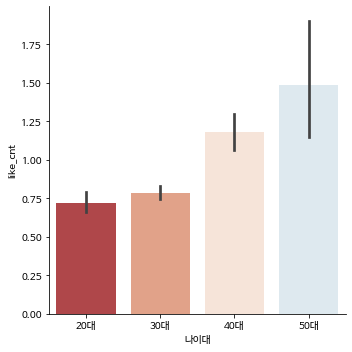

In [ ]:
sns.catplot('나이대', 'like_cnt',data=age_total, kind='bar', order= ['20대','30대','40대','50대'])
plt.show()

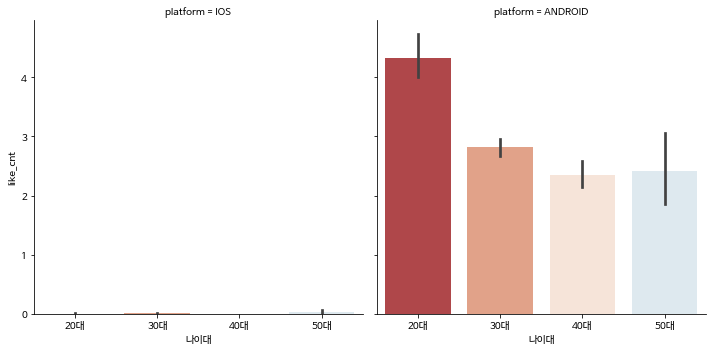

In [ ]:
sns.catplot('나이대', 'like_cnt',data=age_total, col='platform', kind='bar', order= ['20대','30대','40대','50대'])
plt.show()

In [ ]:
user_total.groupby(['나이대'])['like_cnt'].mean()

나이대
0-9세    0.000000
10대     1.053526
20대     0.719611
30대     0.786195
40대     1.179913
50대     1.484813
60대     1.325530
70대     2.037838
80대     0.730159
90대     0.587626
Name: like_cnt, dtype: float64